In [1]:
%matplotlib inline

# Introduction

The Lanczos algorithm is a direct algorithm devised by Cornelius Lanczos that is an adaptation of power methods to find the $m$ "most useful" (tending towards extreme highest/lowest) eigenvalues and eigenvectors of an $n\times n$ Hermitian matrix, where $m$ is often but not necessarily much smaller than $n$.

The following is an implementation of the [standard Lanczos algorithm](https://en.wikipedia.org/wiki/Lanczos_algorithm).

# Import Dependencies

We begin by importing the necessary libraries.

In [2]:
# Data Analysis
import numpy as np 
from numpy import linalg as LA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

# Lanczos Algorithm

The algorithm proceeds as follows:

1. Given a Hermitian matrix $A$ of size $n\times n$, and an arbitrary vector $v_1$ with Euclidean norm 1, specify a default number of function calls $m=n$
2. Let $w_1'$=$Av_1$
3. Let $\alpha_1=w_1'^* v_1$
4. Let $w_1=w_1'^*-\alpha_1 v_1$

We refer to steps 2 - 4 as the first iteration steps. Subsequently, 

5. Let $\beta_j=||w_{j-1}||$
6. If $\beta_j\neq0$, let $v_j=\frac{w_{j-1}}{\beta_j}$. Else, let $v_j$ be an arbitrary vector with Euclidean norm 1 that is orthogonal to $v_1, ..., v_{j-1}$
7. Let $w_j'=Av_j$
8. Let $\alpha_j=w_j'v_j$
9. Let $w_j=w_j'-\alpha_j v_j-\beta_j v_{j-1}$

where $j$ denotes the iteration number, and must satisfy $2\leq j\leq m$. Finally, the output is a tridiagonalized matrix $T$ with $\alpha_1, ..., \alpha_m$ along the main diagonal, and $\beta_2, ..., \beta_m$ along the super- and subdiagonals.

In [3]:
# Function to tri-diagonalize a matrix
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

# Lanczos algorithm
def lanczos(A, v1):
  np.set_printoptions(precision=3, suppress=True)
  # First iteration steps
  x, y = [], []
  n = A.shape[1]
  v2, beta = 0.0, 0.0

  for i in range(n):
    # Iteration steps
    w_prime = np.dot(A, v1)
    conj = np.matrix.conjugate(w_prime)
    alpha = np.dot(conj, v1)
    w = w_prime - alpha * v1 - beta * v2
    beta = np.linalg.norm(w)
    x.append(np.linalg.norm(alpha))

    # Reset
    if i < (n-1):
        y.append(beta)
    v2 = v1
    v1 = w/beta
    
  return tridiag(y, x, y)

# Example

We test our algorithm on an example where $A=\text{diag}\;(0,\;1,\;2,\;3,\;4,\;100000)$.

In [4]:
A = np.diag([0., 1., 2., 3., 4., 100000.])
n = A.shape[1]
v_0 = np.zeros(n)
v_0.fill(1.)
v = v_0 / np.linalg.norm(v_0)

# Obtaining the tri-diagonal matrix T
T = lanczos(A, v)
print(f'Tridiagonalization of A: \n{T}')

# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
w, v = LA.eig(T)
print(f'\nAssociated eigenvalues: \n{w}')
print(f'\nAssociated eigenvectors: \n{v}')

Tridiagonalization of A: 
[[16668.333 37267.054     0.        0.        0.        0.   ]
 [37267.054 83333.667     3.464     0.        0.        0.   ]
 [    0.        3.464     2.        1.183     0.        0.   ]
 [    0.        0.        1.183     2.        1.014     0.   ]
 [    0.        0.        0.        1.014    14.59   1121.957]
 [    0.        0.        0.        0.     1121.957 99987.365]]

Associated eigenvalues: 
[100000.         0.025      3.975      1.274      2.726  99999.955]

Associated eigenvectors: 
[[-0.408  0.426 -0.426 -0.485 -0.485 -0.   ]
 [-0.913 -0.191  0.191  0.217  0.217 -0.   ]
 [-0.     0.652  0.652 -0.273  0.273  0.   ]
 [-0.    -0.531  0.531 -0.467 -0.467  0.   ]
 [-0.     0.273  0.273  0.652 -0.652  0.011]
 [-0.    -0.003 -0.003 -0.007  0.007  1.   ]]


Let's visualize the eigenvalue convergence as a function of the number of iterations.

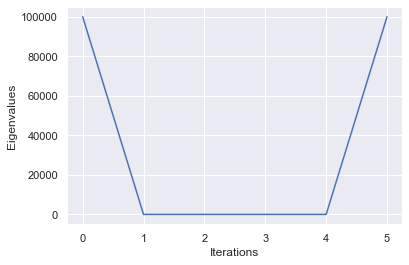

In [5]:
plt.plot(w)
plt.xlabel('Iterations')
plt.ylabel('Eigenvalues')
plt.show()